In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import keras

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images.shape, train_labels.shape, test_images.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

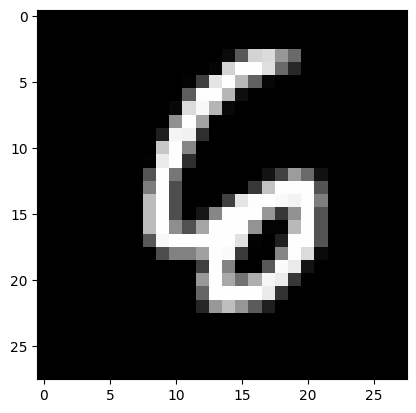

In [3]:
plt.plot()
plt.imshow(train_images[238], cmap=plt.get_cmap('grey'))

In [4]:
train_labels[238]

6

In [5]:
train_images, test_images = train_images/ 255, test_images / 255

In [6]:
train_images[0].shape

(28, 28)

In [7]:
train_images.max(), train_images.min()

(1.0, 0.0)

In [8]:
train_images = train_images.reshape((60000, 28,28, 1))
test_images = test_images.reshape((10000, 28,28, 1))

In [9]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [10]:
test_labels

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [11]:
hidden1 = 100
hidden2 = 100

In [22]:
model = models.Sequential()

# model.add(keras.layers.Input((28,28,1)))

model.add(keras.layers.Conv2D(16,(3,3), activation = 'relu'))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(10, activation='softmax'))

In [23]:
# model.summary()

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [24]:
batch_size = 256
epochs = 4

history = model.fit(train_images, train_labels, batch_size= batch_size, epochs=epochs, verbose=1,validation_data= (test_images, test_labels))

Epoch 1/4
235/235 [==============================] - 7s 23ms/step - loss: 0.4221 - accuracy: 0.8908 - val_loss: 0.2110 - val_accuracy: 0.9417
Epoch 2/4
235/235 [==============================] - 4s 17ms/step - loss: 0.1786 - accuracy: 0.9491 - val_loss: 0.1387 - val_accuracy: 0.9615
Epoch 3/4
235/235 [==============================] - 4s 17ms/step - loss: 0.1210 - accuracy: 0.9657 - val_loss: 0.1040 - val_accuracy: 0.9684
Epoch 4/4
235/235 [==============================] - 4s 18ms/step - loss: 0.0917 - accuracy: 0.9747 - val_loss: 0.0928 - val_accuracy: 0.9737


In [25]:
model.save('mnist.keras')